In [ ]:
# This script will clip the Cropland Data Layers (CDL) to a each irrigation district
# in the given watershed.

# Author: Bridget Bittmann
# Date created: 09/02/2021
# Date modified: 09/03/2021

In [ ]:
# Import necessary packages

!pip install geopandas #install geopandas, will allow import of .shp files
import geopandas as gpd 
import numpy as np #general array computations
import matplotlib.pyplot as plt #to plot data, works with rasterio
!pip install rasterio
import rasterio as rso #to import Geotiff files
from PIL import Image #to work with Geotiff files
!pip install xarray 
import xarray as xr #for stacking arrays of Geotiffs to reduce computation time
import scipy as sc
import io
import netCDF4
import os
!pip install rtree
import rtree #need to clip .shp files with geopands
!pip install pygeos
import pygeos
!pip install shapely
import shapely #validate geometry of irrigation districts for self-intersections

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# Connect to server

from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Connect to server continued

%cd gdrive/MyDrive/spatial_colab/datasets/
%ls

/content/gdrive/MyDrive/spatial_colab/datasets
CDL_subsets/  irrigation_companies/  LBRB_shp/


In [ ]:
## Import files from folders

lbrb_bounds = gpd.read_file('LBRB_shp/LBRB_file.shp')
irig_comp = gpd.read_file('irrigation_companies/irrigation_companies.shp')

# open all CDL files and put them in one array
dirname = 'CDL_subsets' #this is the folder for the .tif files
cdl = [] #array where the .tif files will be stored
for fname in os.listdir(dirname): #lists the names of the files in the folder of dirname (ie. CDL_subsets)
  im = Image.open(os.path.join(dirname, fname)) #joins the folder name with the name of the tif file to open tif files
  imarray = np.array(im) #creates a numpy array of the on of the tif files
  cdl.append(imarray) #adds the tif files into the imarray variable like a list

cdl = np.asarray(cdl) #compiles all the arrays into one array

In [ ]:
#Determine the shape of the cdl array
cdl.shape #shape: 17, 2655, 2961

(17, 2655, 2961)

In [ ]:
## Tranform .shp files to match the geographic coordinate system of the CDL files
#Projection of CDLs: Albers Equal Conical 
#Geographic coordinate system: NAD 1983

#Need to only transform LBRB_bounds, which is in WGS 1984
lbrb_bounds_transform = lbrb_bounds.to_crs(epsg=8826)

In [ ]:
# Need to validate geometry due to self-instersections within irrigation districts
irig_comp_valid = irig_comp.buffer(0) #shapely buffer somehow does this????

In [ ]:
## Clip the irrigation companies across the state to the watershed of choice
 
irrig_lbrb = gpd.clip(irig_comp_valid, lbrb_bounds_transform)

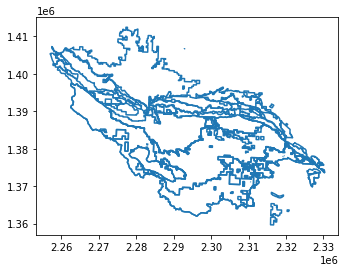

In [ ]:
## Plot the irrigation companies to check the clipping
irrig_lbrb.boundary.plot()

In [ ]:
## Clip rasters to the irrigation districts in the watershed

